# <center>Analisa Persebaran Panas Pada Plat 2 Dimensi Menggunakan *Finite Difference Method*<center>

### <center>Kelompok 5<center>

<center> Amelia Andriyani <center>
<center> Dinda Salsabiila <center>
<center> Deeva Nabila <center>

Dalam termodinamika (heat conduction), persamaan Laplace disebut sebagai persamaan panas keadaan tunak (steady-state) atau persamaan konduksi panas. Proyek ini bertujuan untuk menganalisa sebaran panas pada plat 2 Dimensi menggunakan persamaan Laplace dengan empat kondisi batas yang telah ditentukan. <br>

Persamaan Laplace dalam koordinat kartesian 2 dimensi untuk persamaan panas:<br>
$$\frac{\partial ^{2}T}{\partial x^{2}} + \frac{\partial ^{2}T}{\partial y^{2}}=0 $$<br>
Dimana: <br>
T : Temperatur<br>
x : Dimensi x<br>
y : Dimensi y<br>

Dengan:<br>
$$ \frac{\partial ^{2}T}{\partial x^{2}}=\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^{2}} $$<br>
<center>dan<center><br>
$$ \frac{\partial ^{2}T}{\partial y^{2}}=\frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^{2}}$$<br>
    
Kedua persamaan diatas disubtitusi ke dalam persamaan awal, menjadi:<br>
$$\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^{2}}+\frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^{2}}=0$$

Karena $\Delta x = \Delta y$, persamaan menjadi:<br>
$$T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1}-4T_{i,j}=0$$
    
Dalam kasus ini persamaan akhirnya dapat dituliskan menjadi:<br>
$$T_{i,j}=\frac{1}{4}(T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1}+T_{i,j-1})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Gambaran meshgrid daerah plat yang digunakan:

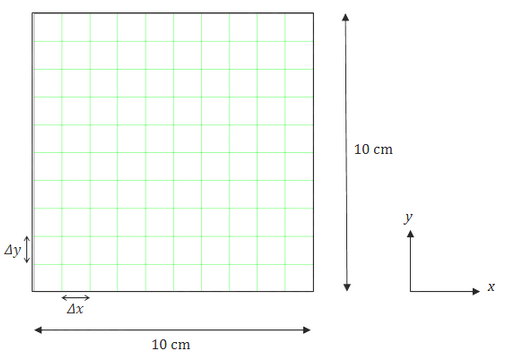

In [2]:
#Iterasi maksimal
maxIter = 500

#Dimensi matriks dan delta
lenX = lenY = 10 
delta = 1

In [3]:
#Kondisi Batas
Ttop = 0
Tbottom = 0
Tleft = 0
Tright = 100

#Initial guess of interior grid
Tguess = 30

"Nilai tebakan" atau variabel Tguess yang digunakan sebesar 30 derajat Celcius. Nilai ini dapat diubah karena pada awalnya nilai ini belum diketahui dan merupakan nilai-nilai yang ingin dicari. Kemudian persamaan diiterasi sampai selisih antara nilai sebelum iterasi dan nilai sampai iterasi “cukup kecil”, disebut konvergensi. Dalam proses iterasi, terjadi “self correction” yaitu penyesuaian sendiri nilai temperatur pada interior grid. Jadi saat nilai tebakan yang di tetapkan mendekati solusi aktualnya, solusi "aktual" dapat ditemukan lebih cepat.

#### Mengatur "plot window" dan meshgrid:

In [4]:
colorinterpolation = 50
colourMap = plt.cm.jet

In [5]:
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
T = np.empty((lenX, lenY))
T.fill(Tguess)

#### Inisiasi kondisi batas

In [6]:
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

#### Perhitungan suhu di setiap titik

In [7]:
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

#### Plotting persebaran panas

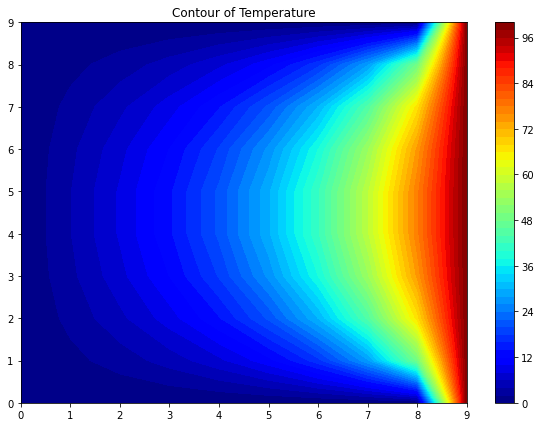

In [8]:
plt.figure(figsize=(10,7))
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()
print("")

## <center> ANALISA <center>

### 1. **Kondisi I (up, down, left = 0 ; right = 100)**

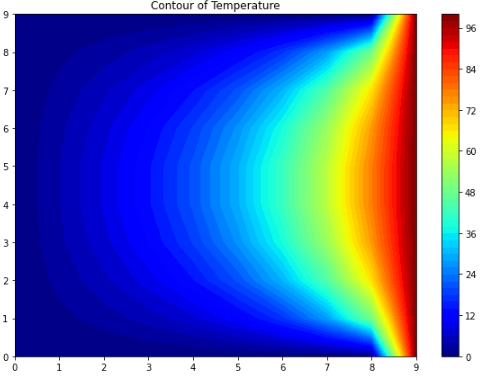

Pada gambar persebaran panas terlihat suhu yang lebih tinggi berada di sisi kanan pelat (ditunjukkan dengan gradasi suhu berwarna merah). Hal ini dikarenakan sisi kanan dari pelat merupakan sumber kalor bagi daerah sekitarnya. Kemudian, gradasi suhu terlihat lebih landai di bagian tengah ke kiri, tetapi cukup curam di bagian atas dan bawah. 

### 2. **Kondisi II (up, right = 0 ; left, down = 100)**

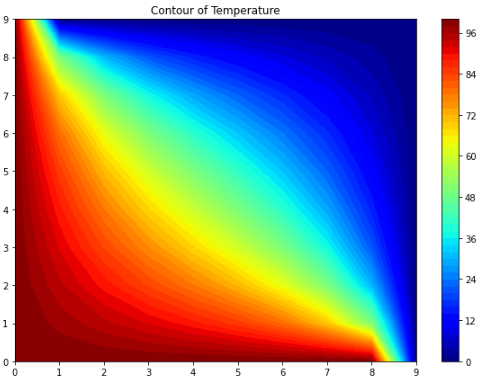

Pada gambar persebaran panas terlihat gradasi suhu berarah diagonal dengan plat. kondisi ini berbeda dengan yang ditunjukkan pada kondisi I dimana gradasi suhu hanya berada pada sisi kanan plat. Hal ini disebabkan pada kondisi II, sisi plat yang bersinggungan (kiri, bawah) diberi suhu tinggi (100 C) sementara dua sisi lainnya diberi suhu rendah (0 C). Suhu tinggi yang ada di kedua sisi plat merupakan sumber kalor bagi bagian dalam plat.

### 3. **Kondisi III (up, down = 0 ; left, right = 100)**

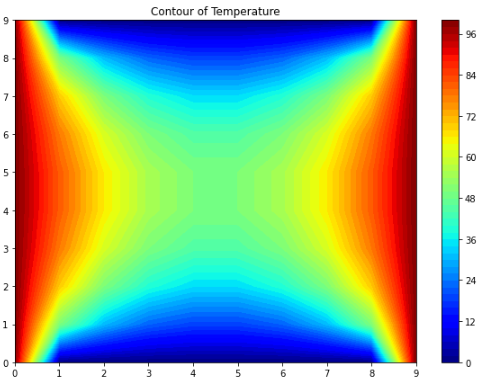

Pada gambar persebaran panas terlihat gradasi suhu lebih landai di bagian tengah plat. Sisi atas dan bawah diberi suhu 0 C. Sumber kalor pada plat ini adalah sisi kanan dan kiri plat dengan suhu sebesar 100 C. Tetapi jumlah kalor yang dibutuhkan untuk membuat bagian tengah bersuhu tinggi masih kurang, maka dari itu gradasi suhu bagian tengah lebih landai.

### 4. **Kondisi IV (left, right, down = 100 ; up = 0)**

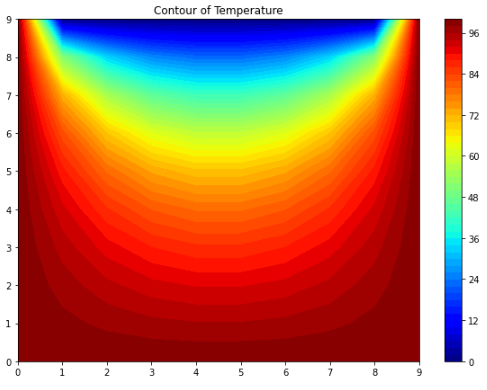

Pada gambar persebaran panas terlihat gradasi suhu lebih tinggi di sisi bawah plat. Kemudian di bagian tengah menuju ke atas, gradasi suhu terlihat lebih landai dan di sisi kanan dan kiri gradasi suhu terlihat lebih curam. Hal ini disebabkan temperatur di bagian atas plat bernilai 0 C.

## <center>KESIMPULAN<center>

Berdasarkan proyek yang sudah dilakukan, terlihat bagaimana perbedaan persebaran kalor dan gradasi suhu bergantung pada kondisi batas yang ditentukan. 

## <center>REFERENSI<center>

Chapra, S. C., & Canale, R. P. (2006). Numerical methods for engineers. Boston: McGraw-Hill Higher Education.